# Exploratory Analysis: 

This is a dataset containing consumer's thought and the star rating of car manufacturer/model/type. Currently, this dataset has data of 62 major brands. I am going to select one major major brand from each major region (North America, Japan and Europe). 

I would be doing descriptive analysis of the data and explore if there are any major anomalies across Car Manufactoring year, Reviewer or Rating.

To begin this exploratory analysis, first import libraries and define functions for plotting the data using matplotlib. Depending on the data, not all plots will be made.

I would be loading, cleaning and comparing following two analysis

1) How a typical reviewer tends to review a American, European and Japanese car.
2) How the review varies for cars by Year Model for American, European and Japanese car.

## I have published my project at following url:- https://www.kaggle.com/amitranjan01/edmunds-data-analysis-car-rating-analysis

In [1]:
#### Link to Dataset on Kaggle: https://www.kaggle.com/amitranjan01/edmunds-data-analysis-cross-continent-review
    
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
#path for kaggle notebook '/kaggle/input'
import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# List files available Only run on my local NoteBook
print(os.listdir("../input"))

../input/.DS_Store
../input/Scraped_Car_Review_mercedes-benz.csv
../input/Scrapped_Car_Reviews_Toyota.csv
../input/Edmunds-Data Analysis - Cross Continent Review.ipynb
../input/Scrapped_Car_Review_Chevrolet.csv
../input/edmundsconsumer-car-ratings-and-reviews/Scrapped_Car_Reviews_Volkswagen.csv
../input/edmundsconsumer-car-ratings-and-reviews/Scraped_Car_Review_lamborghini.csv
../input/edmundsconsumer-car-ratings-and-reviews/Scraped_Car_Review_lotus.csv
../input/edmundsconsumer-car-ratings-and-reviews/Scraped_Car_Review_isuzu.csv
../input/edmundsconsumer-car-ratings-and-reviews/Scraped_Car_Review_ferrari.csv
../input/edmundsconsumer-car-ratings-and-reviews/.DS_Store
../input/edmundsconsumer-car-ratings-and-reviews/Scrapped_Car_Reviews_GMC.csv
../input/edmundsconsumer-car-ratings-and-reviews/Scraped_Car_Review_land-rover.csv
../input/edmundsconsumer-car-ratings-and-reviews/Scraped_Car_Review_lincoln.csv
../input/edmundsconsumer-car-ratings-and-reviews/Scrapped_Car_Reviews_BMW.csv
../inp

In [2]:
#Analyze following three Cars from three different region.
#/kaggle/input/edmundsconsumer-car-ratings-and-reviews/Scrapped_Car_Review_Chevrolet.csv
#/kaggle/input/edmundsconsumer-car-ratings-and-reviews/Scraped_Car_Review_mercedes-benz.csv
#/kaggle/input/edmundsconsumer-car-ratings-and-reviews/Scrapped_Car_Reviews_Toyota.csv

# specify 'None' if want to read whole file
nRowsRead = 10000 

# Scrapped_Car_Reviews_Toyota.csv
#df_J = pd.read_csv('/kaggle/input/edmundsconsumer-car-ratings-and-reviews/Scrapped_Car_Reviews_Toyota.csv', delimiter=',', nrows = nRowsRead)
df_J = pd.read_csv('Scrapped_Car_Reviews_Toyota.csv', delimiter=',', nrows = nRowsRead)
df_J.dataframeName = 'Scrapped_Car_Reviews_Toyota.csv'
nRow, nCol = df_J.shape
df_J_orig = df_J.copy(deep=True)
print(f'There are {nRow} rows and {nCol} columns for Toyota')

# Scrapped_Car_Reviews_Toyota.csv
#df_E = pd.read_csv('/kaggle/input/edmundsconsumer-car-ratings-and-reviews/Scraped_Car_Review_mercedes-benz.csv', delimiter=',', nrows = nRowsRead)
df_E = pd.read_csv('Scraped_Car_Review_mercedes-benz.csv', delimiter=',', nrows = nRowsRead)
df_E.dataframeName = 'Scraped_Car_Review_mercedes-benz.csv'
df_E_orig = df_E.copy(deep=True)
nRow1, nCol1 = df_E.shape
print(f'There are {nRow1} rows and {nCol1} columns for Mercedes')

# Scrapped_Car_Reviews_Toyota.csv
#df_A = pd.read_csv('/kaggle/input/edmundsconsumer-car-ratings-and-reviews/Scrapped_Car_Review_Chevrolet.csv', delimiter=',', nrows = nRowsRead)
df_A = pd.read_csv('Scrapped_Car_Review_Chevrolet.csv', delimiter=',', nrows = nRowsRead)
df_A.dataframeName = 'Scrapped_Car_Review_Chevrolet.csv'
df_A_orig = df_A.copy(deep=True)
nRow2, nCol2 = df_A.shape
print(f'There are {nRow2} rows and {nCol2} columns for Chevrolet')

There are 10000 rows and 7 columns for Toyota
There are 10000 rows and 7 columns for Mercedes
There are 10000 rows and 7 columns for Chevrolet


In [3]:
#Analyze the Columns for the datset

print("Columns for Japense Car: ", df_J.columns)
print("Columns for European Car: ", df_E.columns)
print("Columns for American Car: ", df_A.columns)

Columns for Japense Car:  Index(['Unnamed: 0', 'Review_Date', 'Author_Name', 'Vehicle_Title',
       'Review_Title', 'Review', 'Rating'],
      dtype='object')
Columns for European Car:  Index(['Unnamed: 0', 'Review_Date', 'Author_Name', 'Vehicle_Title',
       'Review_Title', 'Review', 'Rating'],
      dtype='object')
Columns for American Car:  Index(['Unnamed: 0', 'Review_Date', 'Author_Name', 'Vehicle_Title',
       'Review_Title', 'Review', 'Rating'],
      dtype='object')


In [4]:
#Analyze the Columns for the datset

print("Info for Japense Car: ", df_J.info())
print("Info for European Car: ", df_E.info())
print("Info for American Car: ", df_A.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
Unnamed: 0       9999 non-null object
Review_Date      2889 non-null object
Author_Name      2858 non-null object
Vehicle_Title    2858 non-null object
Review_Title     2858 non-null object
Review           2858 non-null object
Rating           497 non-null float64
dtypes: float64(1), object(6)
memory usage: 547.0+ KB
Info for Japense Car:  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
Unnamed: 0       9998 non-null object
Review_Date      2713 non-null object
Author_Name      2687 non-null object
Vehicle_Title    2687 non-null object
Review_Title     2687 non-null object
Review           2687 non-null object
Rating           256 non-null float64
dtypes: float64(1), object(6)
memory usage: 547.0+ KB
Info for European Car:  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (

Unnamed: Sequence number for the rows
Review_Date: Datetime when review was given
Author_Name: Author who gave review. User can give review unimaniously
Vehicle_Title:
Review_Title: 
Review:
Rating:

In [5]:
#Print head to verify the data
print("Head for Japense Car: ", df_J.head())
print("Head for European Car: ", df_E.head())
print("Head for American Car: ", df_A.head())

Head for Japense Car:    Unnamed: 0                  Review_Date     Author_Name  \
0          0   on 02/02/17 19:53 PM (PST)        Ricardo    
1          1   on 12/17/16 16:40 PM (PST)           matt    
2          2   on 04/14/10 07:43 AM (PDT)         Joel G    
3          3   on 11/12/08 17:31 PM (PST)         Dennis    
4          4   on 04/14/08 22:47 PM (PDT)  Alf Skrastins    

                                       Vehicle_Title  \
0          1997 Toyota Previa Minivan LE 3dr Minivan   
1  1997 Toyota Previa Minivan LE All-Trac 3dr Min...   
2          1997 Toyota Previa Minivan LE 3dr Minivan   
3  1997 Toyota Previa Minivan LE All-Trac 3dr Min...   
4  1997 Toyota Previa Minivan LE All-Trac 3dr Min...   

                                        Review_Title  \
0  great vehicle, Toyota best design ever. thank you   
1                 my 4th previa, best van ever made!   
2                             Mom's Taxi Babies Ride   
3                               My Favorite Van E

#Based on the data displayed below some analysis of data is
1) Column: "Unnamed: 0": Is dulicate to index, so we can drop that column
2) Column: Review_Date is of Object Type and has some extra character around date information, so it needs transformation
3) Column Vehicle_Title: This column includes the car Model year, rest information is not important for my anlysis.
4) Column: Rating is a float, for my analysis, I am intrested in distribution of the data, so will need o convert it to int.
5) Column: Review_Title Not needed for my analysis
6) Column: Review Not needed for my analysis

As next step we will analyze the data types of column.

In [6]:
print("Data Types for Japense Car: ", df_J.dtypes)
print("Data Types for European Car: ", df_E.dtypes)
print("Data Types for American Car: ", df_A.dtypes)

Data Types for Japense Car:  Unnamed: 0        object
Review_Date       object
Author_Name       object
Vehicle_Title     object
Review_Title      object
Review            object
Rating           float64
dtype: object
Data Types for European Car:  Unnamed: 0        object
Review_Date       object
Author_Name       object
Vehicle_Title     object
Review_Title      object
Review            object
Rating           float64
dtype: object
Data Types for American Car:  Unnamed: 0        object
Review_Date       object
Author_Name       object
Vehicle_Title     object
Review_Title      object
Review            object
Rating           float64
dtype: object


In [7]:
#Extract the Vechile Make Year from the Vechile Title

df_J['Make_Year'] = df_J['Vehicle_Title'].str[:4]
df_J['Make_Year'] = df_J['Make_Year'].fillna(method ='ffill')
print(df_J['Make_Year'])  

df_E['Make_Year'] = df_E['Vehicle_Title'].str[:4]
df_E['Make_Year'] = df_E['Make_Year'].fillna(method ='ffill')

print(df_E['Make_Year'])  

df_A['Make_Year'] = df_A['Vehicle_Title'].str[:4]
df_A['Make_Year'] = df_A['Make_Year'].fillna(method ='ffill')

print(df_A['Make_Year'])  

0       1997
1       1997
2       1997
3       1997
4       1997
5       1997
6       1997
7       1997
8       2007
9       2007
10      2007
11      2007
12      2007
13      2007
14      2007
15      2007
16      2007
17      2007
18      2007
19      2007
20      2007
21      2007
22      2007
23      2007
24      2007
25      2007
26      2007
27      2007
28      2007
29      2007
        ... 
9970    2002
9971    2002
9972    2002
9973    2002
9974    2002
9975    2002
9976    2002
9977    2002
9978    2002
9979    2002
9980    2002
9981    2002
9982    2002
9983    2002
9984    2002
9985    2002
9986    2002
9987    2002
9988    2002
9989    2002
9990    2002
9991    2002
9992    2002
9993    2002
9994    2002
9995    2002
9996    2002
9997    2002
9998    2002
9999    2002
Name: Make_Year, Length: 10000, dtype: object
0       2002
1       2002
2       2002
3       2002
4       2002
5       2002
6       2002
7       2002
8       2002
9       2002
10      2002
11      2002
12   

In [8]:
# Extract the Review Date from Review
df_J['Review_Date_D'] = df_J['Review_Date'].str[4:12]
df_J['Review_Date_D'] = df_J['Review_Date_D'].fillna(method ='ffill')
df_J['Review_Date_D'] = pd.to_datetime(df_J['Review_Date_D'], errors='coerce')
print(df_J['Review_Date_D'])  

df_E['Review_Date_D'] = df_E['Review_Date'].str[4:13]
df_E['Review_Date_D'] = df_E['Review_Date_D'].fillna(method ='ffill')
df_E['Review_Date_D'] = pd.to_datetime(df_E['Review_Date_D'],  errors='coerce')
print(df_E['Review_Date_D']) 

df_A['Review_Date_D'] = df_A['Review_Date'].str[4:13]
df_A['Review_Date_D'] = df_A['Review_Date_D'].fillna(method ='ffill')
df_A['Review_Date_D'] = pd.to_datetime(df_A['Review_Date_D'], errors='coerce')
print(df_A['Review_Date_D']) 

0      2017-02-02
1      2016-12-17
2      2010-04-14
3      2008-11-12
4      2008-04-14
5      2007-01-28
6      2007-01-08
7      2003-01-07
8      2018-07-10
9      2018-06-10
10     2018-05-23
11     2018-05-19
12     2018-04-30
13     2018-02-17
14     2017-01-14
15     2016-12-15
16     2016-09-01
17     2016-05-29
18     2016-03-13
19     2016-01-20
20     2015-11-12
21     2015-07-12
22     2014-02-28
23     2014-02-07
24     2011-07-01
25     2010-08-12
26     2010-06-15
27     2010-04-13
28     2010-03-16
29     2010-02-25
          ...    
9970   2003-11-10
9971   2003-11-10
9972   2003-11-10
9973   2003-11-10
9974   2003-11-10
9975   2003-11-10
9976   2003-11-10
9977   2003-11-10
9978   2003-11-10
9979   2003-11-10
9980   2003-11-10
9981   2003-11-10
9982   2003-11-10
9983   2003-11-10
9984   2003-11-10
9985   2003-11-10
9986   2003-11-10
9987   2003-11-10
9988   2003-11-10
9989   2003-11-10
9990   2003-11-10
9991   2003-11-10
9992   2003-11-10
9993   2003-11-10
9994   200

Drop Following Columns: They are not Stattistical Important for my Analysis of Rating by Make year or Made in Country
* Unnamed: 0
* Make Year
* Review_Date
* Vehicle_Title
* Review_Title
* Review

In [9]:
#Drop data not required for my analysis. In Place update to exisiting Dataframes
df_E.drop(['Unnamed: 0', 'Review_Date', 'Vehicle_Title', 'Review_Title', 'Review'], axis=1, inplace=True)
df_A.drop(['Unnamed: 0', 'Review_Date', 'Vehicle_Title', 'Review_Title', 'Review'], axis=1, inplace=True)
df_J.drop(['Unnamed: 0', 'Review_Date', 'Vehicle_Title', 'Review_Title', 'Review'], axis=1, inplace=True)

In [10]:
print(df_E.info())
print("99th %tile: ", df_E["Rating"].quantile(0.99))
print(df_E.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
Author_Name      2687 non-null object
Rating           256 non-null float64
Make_Year        10000 non-null object
Review_Date_D    9974 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 312.6+ KB
None
99th %tile:  5.0
           Rating
count  256.000000
mean     4.579102
std      0.631849
min      1.375000
25%      4.500000
50%      4.875000
75%      5.000000
max      5.000000


In [11]:
#Replace the missig entries in Rating column with Mean of Rating
df_E['Rating'].fillna(df_E['Rating'].mean(), inplace=True)
df_A['Rating'].fillna(df_E['Rating'].mean(), inplace=True)
df_J['Rating'].fillna(df_E['Rating'].mean(), inplace=True)

In [12]:
#Replace the missing authoer with anonymous as author
df_E['Author_Name'].fillna('anonymous', inplace=True)
df_A['Author_Name'].fillna('anonymous', inplace=True)
df_J['Author_Name'].fillna('anonymous', inplace=True)

In [13]:
#Add a column representing region where the car belongs. Required to know which data came from which dataframe
df_E['Origin_Region'] = "North America"
df_A['Origin_Region'] = "Eurpoe"
df_J['Origin_Region'] = "Japan"

In [14]:
#After replacing the mean,make sure that the rating is not impacted, we can see 99th %tile:  4.875 is unchanged.
print(df_E.info())
print("99th %tile: ", df_E["Rating"].quantile(0.99))
print(df_E.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
Author_Name      10000 non-null object
Rating           10000 non-null float64
Make_Year        10000 non-null object
Review_Date_D    9974 non-null datetime64[ns]
Origin_Region    10000 non-null object
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 390.7+ KB
None
99th %tile:  4.875
             Rating
count  10000.000000
mean       4.579102
std        0.100903
min        1.375000
25%        4.579102
50%        4.579102
75%        4.579102
max        5.000000


In [15]:
print(df_A.info())
print("99th %tile: ", df_A["Rating"].quantile(0.99))
print(df_A.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
Author_Name      10000 non-null object
Rating           10000 non-null float64
Make_Year        10000 non-null object
Review_Date_D    9994 non-null datetime64[ns]
Origin_Region    10000 non-null object
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 390.7+ KB
None
99th %tile:  4.5791015625
             Rating
count  10000.000000
mean       4.578186
std        0.041058
min        2.500000
25%        4.579102
50%        4.579102
75%        4.579102
max        5.000000


In [16]:
print(df_J.info())
print("99th %tile: ", df_J["Rating"].quantile(0.99))
print(df_J.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
Author_Name      10000 non-null object
Rating           10000 non-null float64
Make_Year        10000 non-null object
Review_Date_D    9969 non-null datetime64[ns]
Origin_Region    10000 non-null object
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 390.7+ KB
None
99th %tile:  5.0
             Rating
count  10000.000000
mean       4.573320
std        0.177028
min        1.000000
25%        4.579102
50%        4.579102
75%        4.579102
max        5.000000


In [17]:
#Append all three dataset
df = df_E.append(df_A).append(df_J)
print(df.shape)
print(df.head(10))
print(df.info())

(30000, 5)
     Author_Name    Rating Make_Year Review_Date_D  Origin_Region
0        George   3.000000      2002    2017-10-25  North America
1   John Campen   5.000000      2002    2006-11-06  North America
2  Fast Machine   5.000000      2002    2005-12-02  North America
3        mbenza   4.250000      2002    2005-10-15  North America
4        augie    5.000000      2002    2005-08-09  North America
5        Walter   4.250000      2002    2005-07-28  North America
6       TheLino   4.625000      2002    2005-07-16  North America
7           r.r   4.125000      2002    2004-08-16  North America
8       Eddie C   4.579102      2002    2004-01-20  North America
9      anonymous  4.579102      2002    2004-01-20  North America
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 9999
Data columns (total 5 columns):
Author_Name      30000 non-null object
Rating           30000 non-null float64
Make_Year        30000 non-null object
Review_Date_D    29937 non-null dateti

In [18]:
# convert the floating Rating to Integer
df['Rating'] = df['Rating'].round(0)
df.head()

,Author_Name,Rating,Make_Year,Review_Date_D,Origin_Region
0,George,3.0,2002,2017-10-25,North America
1,John Campen,5.0,2002,2006-11-06,North America
2,Fast Machine,5.0,2002,2005-12-02,North America
3,mbenza,4.0,2002,2005-10-15,North America
4,augie,5.0,2002,2005-08-09,North America


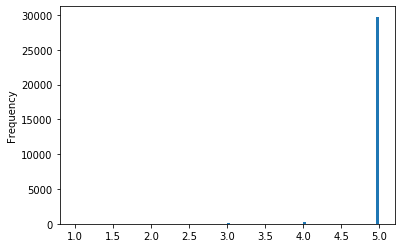

In [19]:
#Plot the Rating to see how the data is distributed
df['Rating'].plot(kind = 'hist', bins = 100)
plt.show()
#Below Data shows that 5 rating is so frequent that other ratings are not vsisble on graph, 
#so chaging the scale of the graph

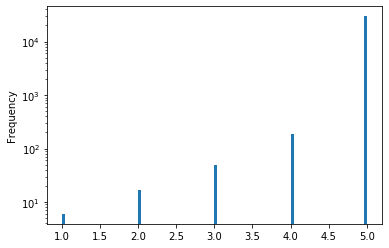

In [20]:
#Plot the Rating to see how the data is distributed - Using Log Scale
df['Rating'].plot(kind = 'hist', bins = 100)
plt.yscale('log')
plt.show()

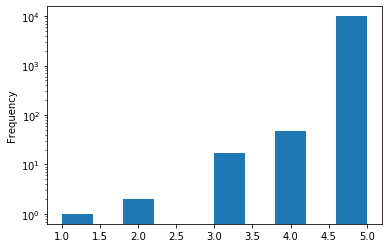

In [21]:
df[df['Origin_Region'] == "North America"]['Rating'].plot(kind = 'hist')
plt.yscale('log')
plt.show()

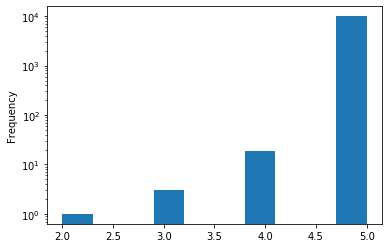

In [22]:
df[df['Origin_Region'] == "Eurpoe"]['Rating'].plot(kind = 'hist')
plt.yscale('log')
plt.show()

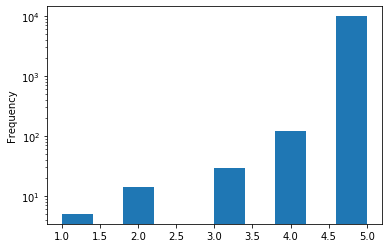

In [23]:
df[df['Origin_Region'] == "Japan"]['Rating'].plot(kind = 'hist')
plt.yscale('log')
plt.show()

Based on above analysis, we can conclude
1) Most of teh Cars are rated 5 across all three regions. Eurpoe and American cars have 99.9% rating of 4.5-4.8 while Japense cars of 99.9 % have rating of 5.
2) 

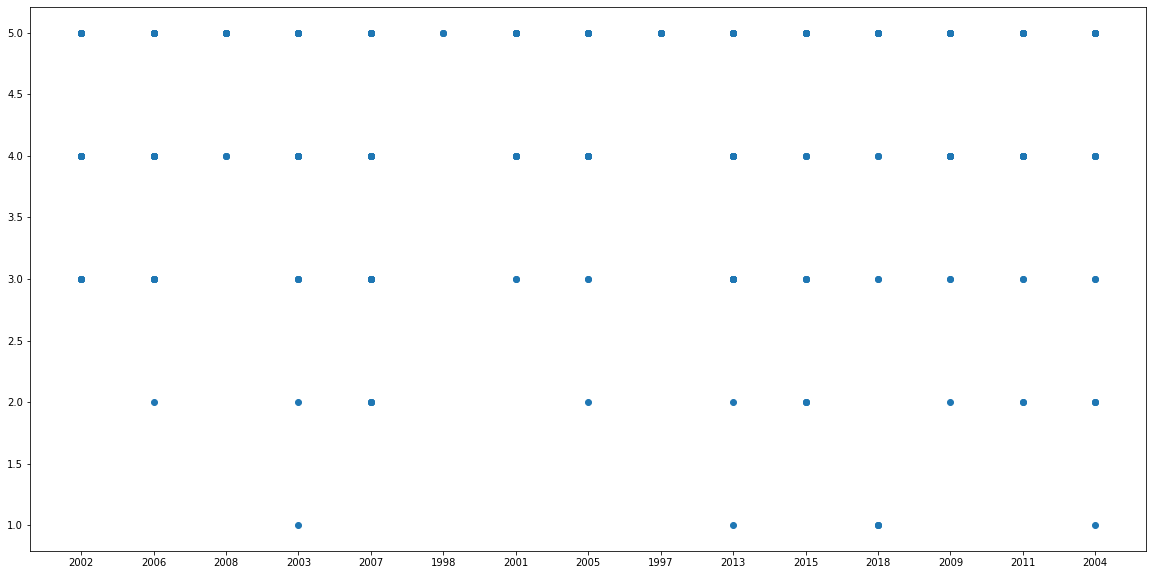

In [24]:
plt.figure(figsize=(20,10))
plt.scatter(df['Make_Year'], df['Rating'] )
plt.show()
#Scatter plot doesn't relveal any specific data aspect.

In [25]:
df['Rating'].groupby(df['Author_Name']).count().nlargest(10)
#Anomalies found, top three revewer has reviewed more than 2000 reviews each. 
#Where as the avarage review per reviewe is just 4
#If we drop top reviewes, we will be left with very small set of data. So we will analyze the data in different section.

Author_Name
anonymous         21093
HD mike            3305
Dave761            2405
Avalon Driver      2330
David                 5
John                  5
Mike                  4
socalh2oskier         4
Ann                   3
Brian                 3
Name: Rating, dtype: int64

In [26]:
#Create a Backup copy of data so that we can process it and analyze it later.
df_copy = df.copy(deep=True)

Above Analysis shows that almost 21,000 reviews were submitted anonymously and top three revieweres submitted too many review.

In [27]:
df.drop(df.loc[df['Author_Name']=='anonymous'].index, inplace=True)
df.drop(df.loc[df['Author_Name']=='HD mike'].index, inplace=True)
df.drop(df.loc[df['Author_Name']=='Dave761'].index, inplace=True)
df.drop(df.loc[df['Author_Name']=='Avalon Driver'].index, inplace=True)

In [28]:
#Total dataset is reduced form 30,000 to 348
df.shape

(348, 5)

In [29]:
df['Rating'].groupby(df['Author_Name']).count().nlargest(10)

Author_Name
HD mike                           83
Dave761                           15
Jeff                               2
John                               2
LHANN                              2
'58 190SL & '07 CLK350 Cabrio      1
1.8T_in _ATL                       1
2013avalon                         1
A.K.                               1
ABerk                              1
Name: Rating, dtype: int64

In [30]:
q = df["Rating"].quantile(0.99)
print(q)
df[df["Rating"] < q].count()
#Total of 84 rating are other than 5. Which is about 20% of total left data

5.0


Author_Name      84
Rating           84
Make_Year        84
Review_Date_D    84
Origin_Region    84
dtype: int64

In [31]:
df['Rating'].groupby(df['Author_Name']).describe()

,count,mean,std,min,25%,50%,75%,max
Author_Name,,,,,,,,
'58 190SL & '07 CLK350 Cabrio,1.0,4.0,NaN,4.0,4.0,4.0,4.0,4.0
1.8T_in _ATL,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
2013avalon,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
A.K.,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
ABerk,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
Alan Weinberg,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0
Alf Skrastins,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
Andrea2001,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
Andy Lejnieks,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0


In [32]:
df_copy['Rating'].groupby(df_copy['Author_Name']).count().nlargest(10)

Author_Name
anonymous         21093
HD mike            3305
Dave761            2405
Avalon Driver      2330
David                 5
John                  5
Mike                  4
socalh2oskier         4
Ann                   3
Brian                 3
Name: Rating, dtype: int64

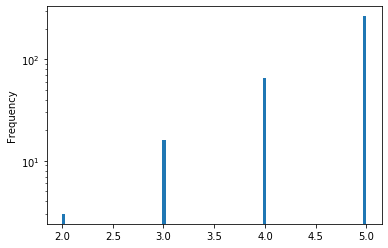

In [33]:
#Plot the Rating to see how the data is distributed - Using Log Scale
df['Rating'].plot(kind = 'hist', bins = 100)
plt.yscale('log')
plt.show()
# The new rating distribution seems very similar to what was in original dataframe.

In [34]:
#Now lets analyze the top reviewers rating pattern
print(df_copy[df_copy['Author_Name'] == "Avalon Driver "]['Origin_Region'].count())
df_copy[df_copy['Author_Name'] == "Avalon Driver "]['Origin_Region'].value_counts()
#Seems like Avalon Driver has only reviewd Japanese car and have given all rating of 5

2330


Japan    2330
Name: Origin_Region, dtype: int64

In [35]:
#Now lets analyze the top reviewers rating pattern
print(df_copy[df_copy['Author_Name'] == "Avalon Driver "]['Rating'].count())
df_copy[df_copy['Author_Name'] == "Avalon Driver "]['Rating'].value_counts()
#Seems like Avalon Driver has only reviewd Japanese car and have given all rating of 5

2330


5.0    2330
Name: Rating, dtype: int64

In [36]:
#Now lets analyze the top reviewers rating pattern
print(df_copy[df_copy['Author_Name'] == "Avalon Driver "]['Make_Year'].count())
df_copy[df_copy['Author_Name'] == "Avalon Driver "]['Make_Year'].value_counts()
#Seems like Avalon Driver has given all reviews in one year whcih is 2002

2330


2002    2330
Name: Make_Year, dtype: int64

In [37]:
#Now lets analyze the top reviewers rating pattern
print(df_copy[df_copy['Author_Name'] == "Dave761 "]['Origin_Region'].count())
df_copy[df_copy['Author_Name'] == "Dave761 "]['Origin_Region'].value_counts()
#Seems like Avalon Driver has only reviewd Japanese car and have given all rating of 5

2405


North America    2405
Name: Origin_Region, dtype: int64

In [38]:
#Now lets analyze the top reviewers rating pattern
print(df_copy[df_copy['Author_Name'] == "Dave761 "]['Rating'].count())
df_copy[df_copy['Author_Name'] == "Dave761 "]['Rating'].value_counts()
#Seems like Avalon Driver has only reviewd Japanese car and have given all rating of 5

2405


5.0    2405
Name: Rating, dtype: int64

In [39]:
#Now lets analyze the top reviewers rating pattern
print(df_copy[df_copy['Author_Name'] == "Dave761 "]['Make_Year'].count())
df_copy[df_copy['Author_Name'] == "Dave761 "]['Make_Year'].value_counts()
#Seems like Avalon Driver has given all reviews in one year whcih is 2002

2405


2001    2405
Name: Make_Year, dtype: int64

In [40]:
#ax = df_copy.plot(x="Make_Year", y="Rating", kind="bar")
#df_copy.plot(x="Make_Year", y="Rating", kind="bar", ax=ax, color="C2")
#plt.show()

Based on Analysis so far, we have only discovered few intresting facts about data. Now we are going back to original data set and take a different approach. This time, we will
1) Not change rating from fraction to integer
2) Not fill the missing year to Make Year
3) See how much data is there after dropping and is it enough for analysis. We will avoid any filling.

In [41]:
#Load Original Data (unmodified)
print(df_A_orig.info())
print(df_J_orig.info())
print(df_E_orig.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
Unnamed: 0       10000 non-null object
Review_Date      3368 non-null object
Author_Name      3362 non-null object
Vehicle_Title    3362 non-null object
Review_Title     3362 non-null object
Review           3362 non-null object
Rating           51 non-null float64
dtypes: float64(1), object(6)
memory usage: 547.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
Unnamed: 0       9999 non-null object
Review_Date      2889 non-null object
Author_Name      2858 non-null object
Vehicle_Title    2858 non-null object
Review_Title     2858 non-null object
Review           2858 non-null object
Rating           497 non-null float64
dtypes: float64(1), object(6)
memory usage: 547.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
Unnamed: 0       9998 non-nul

In [42]:
df_A_orig1 = df_A_orig.copy(deep=True)
df_A_orig1.dropna(subset = ['Rating'], inplace=True)
print(df_A_orig1.head())
print(df_A_orig1.shape)
df_A_orig1.info()
#If I drop all NA, then I am only left with 51 rows of data out of 10,000 rows. So that is not best option. 
#Lets take another approach

  Unnamed: 0                  Review_Date        Author_Name  \
0          0   on 01/27/08 19:13 PM (PST)   Cajun Silverado    
1          1   on 04/17/06 18:26 PM (PDT)              rick    
2          2   on 01/28/06 21:38 PM (PST)        Luvmytruck    
3          3   on 12/03/05 19:35 PM (PST)  Kevin VanAntwerp    
4          4   on 02/18/18 11:27 AM (PST)       Mark Bucher    

                                       Vehicle_Title  \
0  2006 Chevrolet Silverado 1500HD Crew Cab LT1 4...   
1  2006 Chevrolet Silverado 1500HD Crew Cab LT3 4...   
2  2006 Chevrolet Silverado 1500HD Crew Cab LT1 4...   
3  2006 Chevrolet Silverado 1500HD Crew Cab LT1 4...   
4  2002 Chevrolet Silverado 1500HD Crew Cab 4dr C...   

                              Review_Title  \
0                        Silverado Success   
1                             2006 HD 2500   
2  Love the truck but not the fuel mileage   
3                              Tow Vehicle   
4                              1500HD Crew   

 

In [43]:
df_E_orig1 = df_E_orig.copy(deep=True)
df_E_orig1.dropna(subset = ['Rating'], inplace=True)
print(df_E_orig1.head())
print(df_E_orig1.shape)
df_E_orig1.info()
#If I drop all NA, then I am only left with 51 rows of data out of 10,000 rows. So that is not best option. 
#Lets take another approach

  Unnamed: 0                  Review_Date    Author_Name  \
0          0   on 10/25/17 13:28 PM (PDT)        George    
1          1   on 11/06/06 20:38 PM (PST)   John Campen    
2          2   on 12/02/05 16:45 PM (PST)  Fast Machine    
3          3   on 10/15/05 07:37 AM (PDT)        mbenza    
4          4   on 08/09/05 20:22 PM (PDT)        augie     

                                       Vehicle_Title  \
0  2002 Mercedes-Benz CLK-Class CLK55 AMG CLK55 A...   
1  2002 Mercedes-Benz CLK-Class CLK55 AMG CLK55 A...   
2  2002 Mercedes-Benz CLK-Class CLK55 AMG CLK55 A...   
3  2002 Mercedes-Benz CLK-Class CLK55 AMG CLK55 A...   
4  2002 Mercedes-Benz CLK-Class CLK55 AMG CLK55 A...   

                       Review_Title  \
0               Mercedes fun in sun   
1                       AMG Rocket!   
2                        Fine Coupe   
3                             CLK55   
4  Best combo of comfort and speed!   

                                              Review  Rating  
0   

In [44]:
df_J_orig1 = df_J_orig.copy(deep=True)
df_J_orig1.dropna(subset = ['Rating'], inplace=True)
print(df_J_orig1.head())
print(df_J_orig1.shape)
df_J_orig1.info()
#If I drop all NA, then I am only left with 51 rows of data out of 10,000 rows. So that is not best option. 
#Lets take another approach

  Unnamed: 0                  Review_Date     Author_Name  \
0          0   on 02/02/17 19:53 PM (PST)        Ricardo    
1          1   on 12/17/16 16:40 PM (PST)           matt    
2          2   on 04/14/10 07:43 AM (PDT)         Joel G    
3          3   on 11/12/08 17:31 PM (PST)         Dennis    
4          4   on 04/14/08 22:47 PM (PDT)  Alf Skrastins    

                                       Vehicle_Title  \
0          1997 Toyota Previa Minivan LE 3dr Minivan   
1  1997 Toyota Previa Minivan LE All-Trac 3dr Min...   
2          1997 Toyota Previa Minivan LE 3dr Minivan   
3  1997 Toyota Previa Minivan LE All-Trac 3dr Min...   
4  1997 Toyota Previa Minivan LE All-Trac 3dr Min...   

                                        Review_Title  \
0  great vehicle, Toyota best design ever. thank you   
1                 my 4th previa, best van ever made!   
2                             Mom's Taxi Babies Ride   
3                               My Favorite Van Ever   
4               

In [45]:
#Create new column for Country Of Origin
#Add a column representing region where the car belongs. Required to know which data came from which dataframe
df_E_orig1['Origin_Region'] = "North America"
df_A_orig1['Origin_Region'] = "Eurpoe"
df_J_orig1['Origin_Region'] = "Japan"

In [46]:
# Extract the Review Date from Review
df_J_orig1['Review_Date_D'] = df_J_orig1['Review_Date'].str[4:12]
#df_J_orig1['Review_Date_D'] = df_J_orig1['Review_Date_D'].fillna(method ='ffill')
df_J_orig1['Review_Date_D'] = pd.to_datetime(df_J_orig1['Review_Date_D'], errors='coerce')
print(df_J_orig1['Review_Date_D'])  

df_E_orig1['Review_Date_D'] = df_E_orig1['Review_Date'].str[4:13]
#df_E_orig1['Review_Date_D'] = df_E_orig1['Review_Date_D'].fillna(method ='ffill')
df_E_orig1['Review_Date_D'] = pd.to_datetime(df_E_orig1['Review_Date_D'],  errors='coerce')
print(df_E_orig1['Review_Date_D']) 

df_A_orig1['Review_Date_D'] = df_A_orig1['Review_Date'].str[4:13]
#df_A_orig1['Review_Date_D'] = df_A_orig1['Review_Date_D'].fillna(method ='ffill')
df_A_orig1['Review_Date_D'] = pd.to_datetime(df_A_orig1['Review_Date_D'], errors='coerce')
print(df_A_orig1['Review_Date_D']) 

0     2017-02-02
1     2016-12-17
2     2010-04-14
3     2008-11-12
4     2008-04-14
5     2007-01-28
6     2007-01-08
7     2003-01-07
8     2018-07-10
9     2018-06-10
10    2018-05-23
11    2018-05-19
12    2018-04-30
13    2018-02-17
14    2017-01-14
15    2016-12-15
16    2016-09-01
17    2016-05-29
18    2016-03-13
19    2016-01-20
20    2015-11-12
21    2015-07-12
22    2014-02-28
23    2014-02-07
24    2011-07-01
25    2010-08-12
26    2010-06-15
27    2010-04-13
28    2010-03-16
29    2010-02-25
         ...    
601   2004-04-26
602   2004-04-23
603   2004-04-21
606   2004-04-11
607   2004-04-11
616   2004-04-11
617   2018-07-28
618   2018-04-23
619   2018-04-07
620   2018-02-07
621   2017-12-16
622   2017-06-30
623   2017-03-19
624   2016-10-15
625   2015-11-22
626   2010-11-28
627   2010-08-18
628   2009-08-11
629   2008-07-30
630   2008-03-30
631   2008-03-07
632   2007-08-28
633   2007-05-11
634   2007-03-08
635   2007-01-15
636   2006-08-17
637   2006-03-04
638   2005-02-

In [47]:
#Extract the Vechile Make Year from the Vechile Title

df_J_orig1['Make_Year'] = df_J_orig1['Vehicle_Title'].str[:4]
#df_J_orig1['Make_Year'] = df_J_orig1['Make_Year'].fillna(method ='ffill')
print(df_J_orig1['Make_Year'])  

df_E_orig1['Make_Year'] = df_E_orig1['Vehicle_Title'].str[:4]
#df_E_orig1['Make_Year'] = df_E_orig1['Make_Year'].fillna(method ='ffill')
print(df_E_orig1['Make_Year'])  

df_A_orig1['Make_Year'] = df_A_orig1['Vehicle_Title'].str[:4]
#df_A_orig1['Make_Year'] = df_A_orig1['Make_Year'].fillna(method ='ffill')

print(df_A_orig1['Make_Year'])  

0      1997
1      1997
2      1997
3      1997
4      1997
5      1997
6      1997
7      1997
8      2007
9      2007
10     2007
11     2007
12     2007
13     2007
14     2007
15     2007
16     2007
17     2007
18     2007
19     2007
20     2007
21     2007
22     2007
23     2007
24     2007
25     2007
26     2007
27     2007
28     2007
29     2007
       ... 
601    2004
602    2004
603    2004
606    2004
607    2004
616    2004
617    2002
618    2002
619    2002
620    2002
621    2002
622    2002
623    2002
624    2002
625    2002
626    2002
627    2002
628    2002
629    2002
630    2002
631    2002
632    2002
633    2002
634    2002
635    2002
636    2002
637    2002
638    2002
639    2002
640    2002
Name: Make_Year, Length: 497, dtype: object
0      2002
1      2002
2      2002
3      2002
4      2002
5      2002
6      2002
7      2002
18     2002
23     2002
24     2002
25     2002
26     2002
27     2002
28     2002
29     2002
30     2002
31     2002
32     2

In [48]:
df_tot = df_J_orig1.append(df_A_orig1).append(df_E_orig1)
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 0 to 379
Data columns (total 10 columns):
Unnamed: 0       804 non-null object
Review_Date      804 non-null object
Author_Name      804 non-null object
Vehicle_Title    804 non-null object
Review_Title     804 non-null object
Review           804 non-null object
Rating           804 non-null float64
Origin_Region    804 non-null object
Review_Date_D    804 non-null datetime64[ns]
Make_Year        804 non-null object
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 69.1+ KB


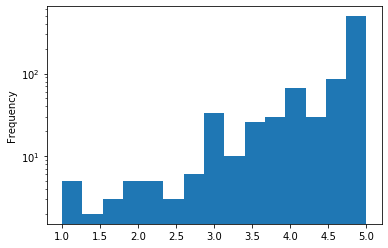

In [49]:
#Plot the Rating to see how the data is distributed - Using Log Scale
df_tot['Rating'].plot(kind = 'hist', bins = 15)
plt.yscale('log')
plt.show()
# The new rating distribution seems more like a continous distribution.

In [50]:
df_tot['Rating'].groupby(df_tot['Author_Name']).count().nlargest(10)
#even authors have good reviews distribution with more even review frqquency

Author_Name
David             5
John              5
Mike              4
socalh2oskier     4
Ann               3
Brian             3
Jeff              3
carlupi           3
CBP               2
Chris Jones       2
Name: Rating, dtype: int64

In [51]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 0 to 379
Data columns (total 10 columns):
Unnamed: 0       804 non-null object
Review_Date      804 non-null object
Author_Name      804 non-null object
Vehicle_Title    804 non-null object
Review_Title     804 non-null object
Review           804 non-null object
Rating           804 non-null float64
Origin_Region    804 non-null object
Review_Date_D    804 non-null datetime64[ns]
Make_Year        804 non-null object
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 89.1+ KB


In [52]:
df_tot_new = df_tot[['Review_Date_D','Author_Name','Rating','Make_Year','Origin_Region']]

In [53]:
df_tot_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 0 to 379
Data columns (total 5 columns):
Review_Date_D    804 non-null datetime64[ns]
Author_Name      804 non-null object
Rating           804 non-null float64
Make_Year        804 non-null object
Origin_Region    804 non-null object
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 57.7+ KB


In [54]:
grp = df_tot_new.groupby(['Author_Name','Origin_Region','Make_Year'])['Author_Name','Make_Year','Origin_Region','Rating','Review_Date_D']

In [55]:
grp.describe(include='all')

Author_Name         \
                                                             count unique   
Author_Name                    Origin_Region Make_Year                      
'58 190SL & '07 CLK350 Cabrio  North America 2007                1      1   
...                            North America 2001                1      1   
07avalonsucs                   Japan         2007                1      1   
1.8T_in _ATL                   North America 2002                1      1   
2013avalon                     Japan         2013                1      1   
2013limited                    Japan         2013                1      1   
7X                             North America 2007                1      1   
A. Luckey                      Japan         2011                1      1   
A.K.                           North America 2002                1      1   
ABerk                          Japan         2007                1      1   
ALEX SHULMAN                   North America 2003                1      1   
AgentScott                     North America 2003                1      1   
Alan Weinberg                  North America 2003                1      1   
Alf Skrastins                  Japan         1997                1      1   
Allan Whaite                   Japan         2005                1      1   
Andrea2001                     North America 2002                1      1   
Andy Lejnieks                  North America 2002                1      1   
Ann                            Japan         2004                1      1   
                                             2009                1      1   
                                             2011                1      1   
Anne Clarkson                  Japan         2009                1      1   
Anonymous                      Japan         2009                1      1   
Antonio Gonzales               Japan         2004                1      1   
Arnold                         Japan         2007                1      1   
Arnold Melnikoff               Japan         2007                1      1   
Ashley Fletcher                Japan         2013                1      1   
Ashly                          North America 2006                1      1   
Audrey Parks                   North America 2003                1      1   
AutoDrone                      Japan         2011                1      1   
Avalon Grandma                 Japan         2009                1      1   
...                                                            ...    ...   
swerge                         Japan         2005                1      1   
tdiaz                          Japan         1997                1      1   
tgreen                         Eurpoe        2005                1      1   
thomas hoehn                   Japan         2003                1      1   
tom                            Japan         2015                1      1   
toothship                      Japan         2004                1      1   
toyota again                   Japan         2002                1      1   
tractorbill                    North America 2001                1      1   
travelerjb                     Japan         2003                1      1   
trd277                         North America 2002                1      1   
trumpet                        Japan         2007                1      1   
twigster                       Japan         2013                1      1   
two jay                        Japan         2004                1      1   
vashondean                     Japan         2004                1      1   
vdsavage                       Japan         2003                1      1   
vince                          Japan         2011                1      1   
vinnievideo                    Japan         2004                1      1   
vinny                          Japan         2013                1      1   
webman58                       Japan         2003  

In [56]:
df_tot_new['Make_Year'] =  pd.to_datetime(df_tot_new['Make_Year'], errors='coerce', format='%Y')

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


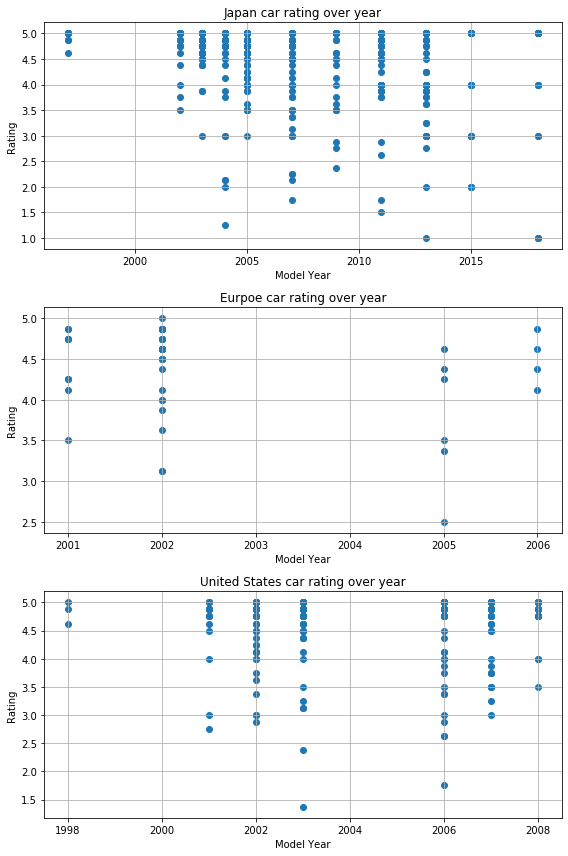

In [57]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,12))

tw = df_tot_new[df_tot_new['Origin_Region'] == 'Japan']['Make_Year'].dt.year
tw.sort_values()
tm = df_tot_new[df_tot_new['Origin_Region'] == 'Japan']['Rating']

sw = df_tot_new[df_tot_new['Origin_Region'] == 'Eurpoe']['Make_Year'].dt.year
sm = df_tot_new[df_tot_new['Origin_Region'] == 'Eurpoe']['Rating']
sw.sort_values()

kw = df_tot_new[df_tot_new['Origin_Region'] == 'North America']['Make_Year'].dt.year
km = df_tot_new[df_tot_new['Origin_Region'] == 'North America']['Rating']
kw.sort_values()

plt.subplot(3, 1, 1)
plt.scatter(tw, tm)
plt.xlabel('Model Year')
plt.ylabel('Rating')
plt.title('Japan car rating over year')
plt.grid(True)


plt.subplot(3, 1, 2)

plt.scatter(sw, sm)
plt.xlabel('Model Year')
plt.ylabel('Rating')
plt.title('Eurpoe car rating over year')
plt.grid(True)

plt.subplot(3, 1, 3)

plt.scatter(kw, km)
plt.xlabel('Model Year')
plt.ylabel('Rating')
plt.title('United States car rating over year')
plt.grid(True)


plt.tight_layout()
plt.show()

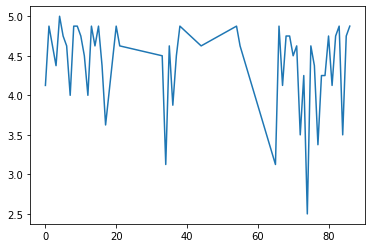

In [58]:
sm.plot()
ticks,labels = plt.xticks()

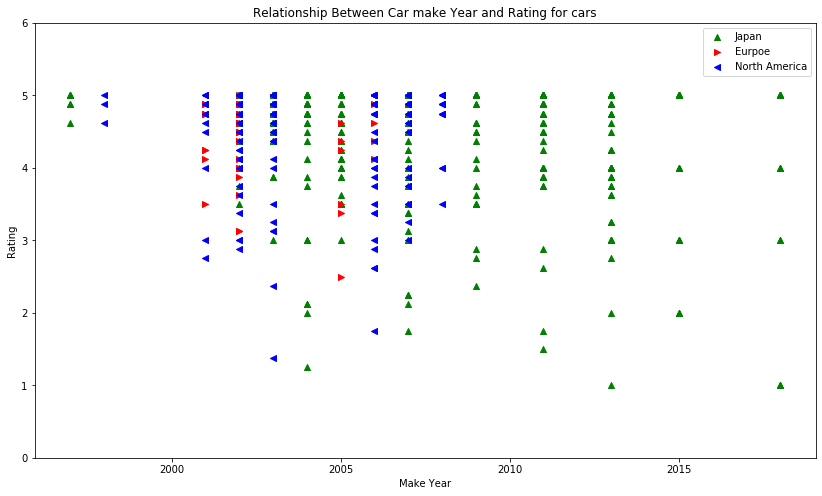

In [59]:
plt.figure(figsize=(14,8))

X = tw
X1 =sw 
X2 =kw 
Y = tm
Y1 = sm
Y2 = km
plt.scatter(X,Y,  marker = '^', color = 'Green', label ='Japan')
plt.scatter(X1,Y1,  marker = '>', color = 'Red', label ='Eurpoe')
plt.scatter(X2,Y2,  marker = '<', color = 'Blue', label ='North America',)
plt.xlabel('Make Year')
plt.ylabel('Rating')
plt.legend(loc='best')
plt.title('Relationship Between Car make Year and Rating for cars')
plt.ylim(0,6)
plt.show()

This is a logical end to my descriptive analysis. A further extension of this analysis can be forensic analysis or creating a model which can predict the Rating of a given car based on Make year, Model / Country of origin and may be we can extract more information about car features like Engine capcity etc. So far what we have learnt about the dataset.

1) Data has many columns, big chunk of the information in the dataset is in form of descriptive set. Which makes it a good candidates for sentiment analysis.
2) There is enough data about 5% of total data where we have enough information to look into ratings and explore how rating were awarded, what things influenced the rating like Where car technology originated e.g. Asia (japan), Europe or USA.
3) The Rating dataset (subset of data cleaned up for Rating analysis) has some anolmolies 
    a) The Rating is not evenly distributed (not a normal distribution). It's negatively skewed
    b) Lot of review were provided anonymously, so making it difficult to identify reviewer pattern.
    c) Most of reviewers have reviewed same car for multiple times (1-5), so we cannot predict the reviewer bias about a given car or any comparison for same reviewer reviewing different cars. Which kind of make sense that user in japan would not have multiple cars to use and provide review.
    d) There were few reviewer anomalies where in one year few reviewers have reviewed 2000-3000 review for same car and all 5 rating.
4) Rating density distribution increases from 4 - 5.
5) Different cars across region has consistent rating across the decade. Average rating remained same.
6) Japan cars have slightly higher 99th percentile (5.0) rating and European / American (4.5 - 4.8)
